# 3- Visualization

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel("adverts.xlsx")

In [8]:
df = data.copy()
df.tail()

,Unnamed: 0.1,Unnamed: 0,city,district,neighborhood,room,m²,price
24602,24602,24604,Yozgat,Sorgun,Yeni,3+1,120,3500
24603,24603,24605,Yozgat,Yerköy,100. Yıl,3+1,135,4250
24604,24604,24606,Yozgat,Yerköy,Ayanoğlu,3+1,135,5250
24605,24605,24607,Yozgat,Yerköy,100. Yıl,3+1,140,3250
24606,24606,24608,Zonguldak,Çaycuma,Karamusa,3+1,120,11000


In [9]:
df.drop(["Unnamed: 0","Unnamed: 0.1"], axis=1, inplace=True)
df.tail()

,city,district,neighborhood,room,m²,price
24602,Yozgat,Sorgun,Yeni,3+1,120,3500
24603,Yozgat,Yerköy,100. Yıl,3+1,135,4250
24604,Yozgat,Yerköy,Ayanoğlu,3+1,135,5250
24605,Yozgat,Yerköy,100. Yıl,3+1,140,3250
24606,Zonguldak,Çaycuma,Karamusa,3+1,120,11000


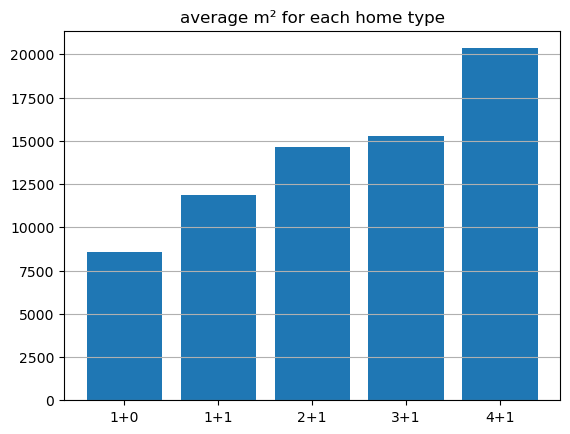

In [12]:
# average price for each home type
y = df.groupby("room")["price"].mean()
x = np.array(["1+0", "1+1", "2+1", "3+1", "4+1"])

plt.grid(axis="y")
plt.title("average m² for each home type")
plt.bar(x,y)
plt.show()

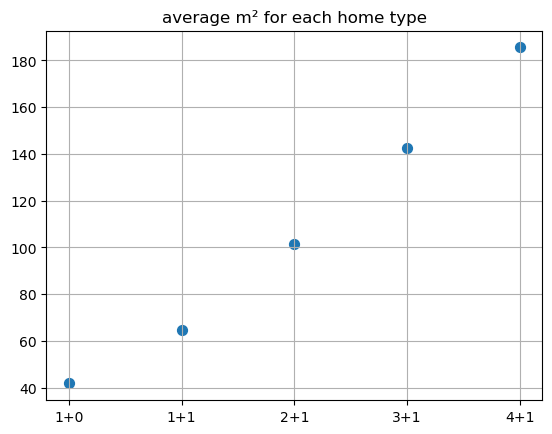

In [13]:
# average m² for each home type
y = df.groupby("room")["m²"].mean()
x = np.array(["1+0", "1+1", "2+1", "3+1", "4+1"])

plt.grid()
plt.title("average m² for each home type")
plt.scatter(x,y, s=50)
plt.show()

In [14]:
# count of home type
# the code below can also write using 'groupby' method!

unique_room_list = df["room"].unique()

twoone= [] # mean of "twoone" is "2+1" house
fourone= []
treeone= []
oneone= []
onezero= []

for i in range(len(df)):
    if unique_room_list[0] == df["room"][i]:
        twoone.append(df["room"][i])
    elif unique_room_list[1] == df["room"][i]:
        fourone.append(df["room"][i])
    elif unique_room_list[2] == df["room"][i]:
        treeone.append(df["room"][i])
    elif unique_room_list[3] == df["room"][i]:
        oneone.append(df["room"][i])
    else:
        onezero.append(df["room"][i])

print(f"count of 4+1 house: {len(fourone)}")
print(f"count of 3+1 house: {len(treeone)}")
print(f"count of 2+1 house: {len(twoone)}")
print(f"count of 1+1 house: {len(oneone)}")
print(f"count of 1+0 house: {len(onezero)}")

count of 4+1 house: 1230
count of 3+1 house: 9054
count of 2+1 house: 9125
count of 1+1 house: 4720
count of 1+0 house: 478


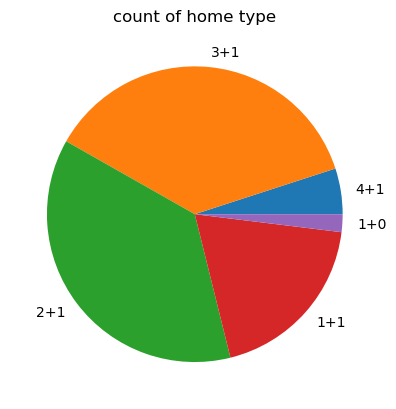

In [15]:
# count of home type
# determination x and y labels of pie chart 
x = np.array(["4+1", "3+1", "2+1", "1+1", "1+0"])
y = np.array([len(fourone), len(treeone), len(twoone), len(oneone), len(onezero)])

# create pie chart
plt.pie(y, labels=x)
plt.title("count of home type")
plt.show()

In [16]:
# Average of rental house prices of each cities
prices_mean_of_each_cities = df.groupby("city")["price"].mean()

prices_mean_of_each_cities = pd.DataFrame(prices_mean_of_each_cities)
prices_mean_of_each_cities.head()

,price
city,
Adana,9260.626620
Adıyaman,10090.909091
Afyonkarahisar,8704.065041
Aksaray,5140.000000
Amasya,8192.647059


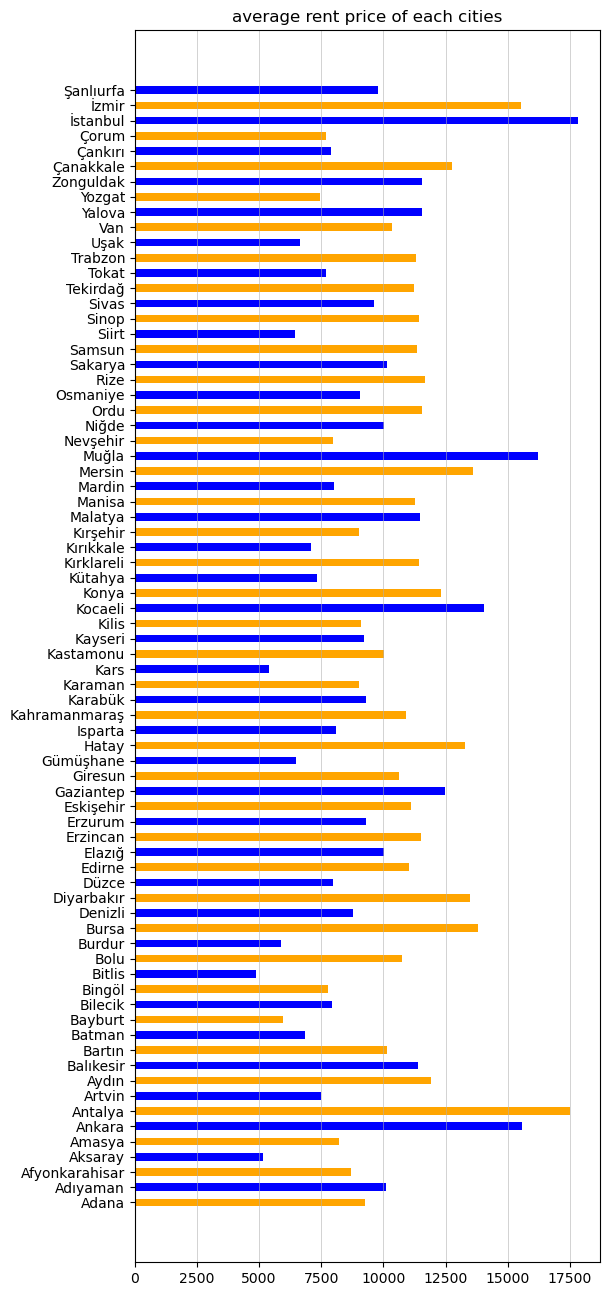

In [17]:
# average rent price of each cities
x = prices_mean_of_each_cities.index
y = prices_mean_of_each_cities["price"]

plt.figure(figsize=(6, 16))
plt.grid(linewidth=0.4,  axis="x")

plt.barh(x, y,  height=0.5,  color=["orange","blue"])

plt.title("average rent price of each cities")

plt.show()

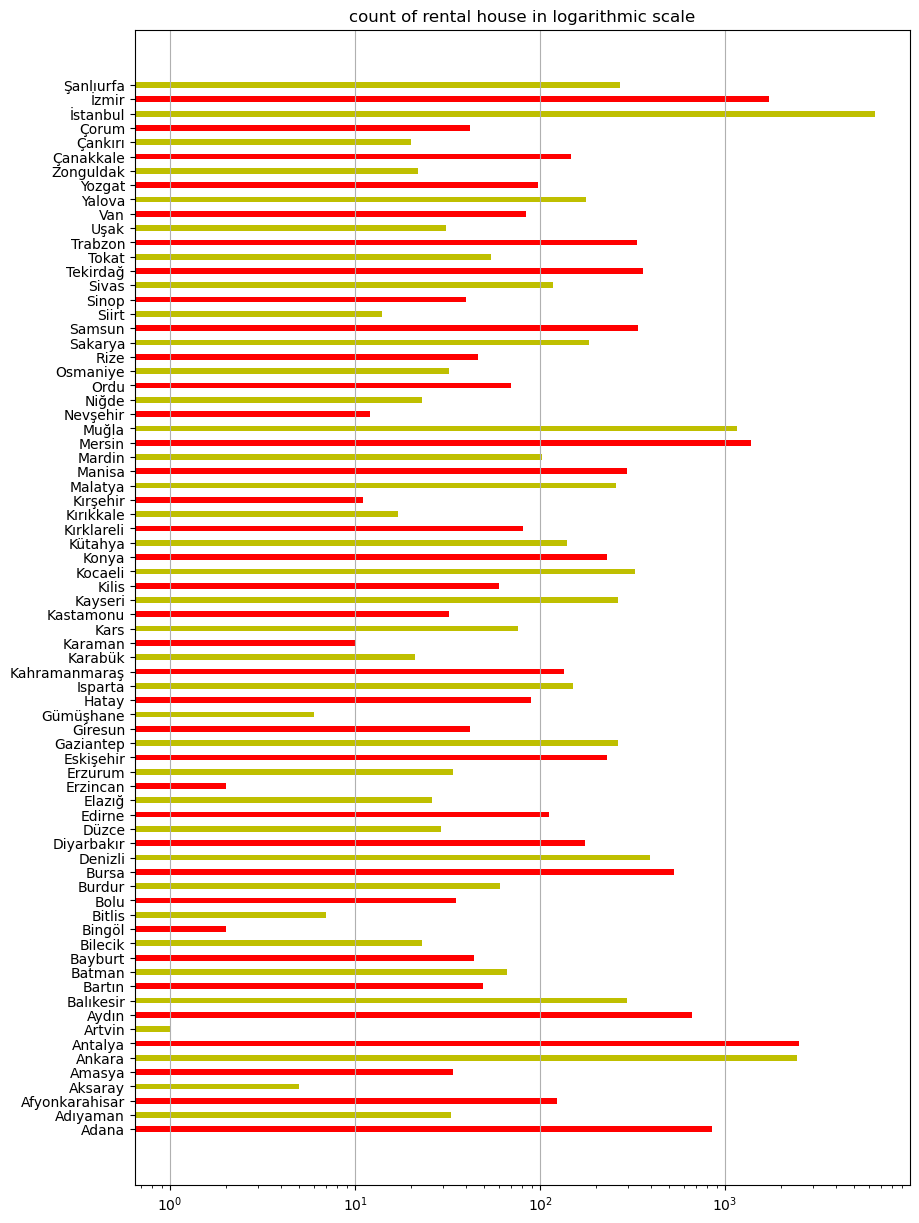

In [18]:
# count of rental house in logarithmic scale
df["constant"] = 1

y = df.groupby("city")["constant"].sum()
x = pd.DataFrame(y).index

plt.figure(figsize=(10, 15))
plt.grid(axis="x")
plt.xscale("log")

plt.barh(x, y, height=0.4,  color=["red","y"])
plt.title("count of rental house in logarithmic scale")
plt.show()